In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import joblib

In [2]:
df = pd.read_csv("cropData.csv")

In [3]:
df.head()

,Temperature,Humidity,Rainfall,Soil_pH,N,P,K,Crop,Disease
0,21.3,61.5,134.1,5.89,64,59,27,Potato,Early Blight
1,22.2,67.5,149.2,6.12,83,22,44,Potato,Late Blight
2,22.6,53.0,127.0,6.59,101,39,43,Wheat,Powdery Mildew
3,34.1,48.8,271.5,6.49,94,36,36,Rice,Leaf Blast
4,37.6,40.0,237.4,6.57,64,50,36,Cotton,Bacterial Blight


In [4]:
df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
Soil_pH        0
N              0
P              0
K              0
Crop           0
Disease        0
dtype: int64

In [5]:
df.describe()

,Temperature,Humidity,Rainfall,Soil_pH,N,P,K
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,27.421776,70.252459,180.633251,6.467085,89.844536,42.448907,36.084426
std,5.308921,12.850265,48.458867,0.441650,15.086890,9.500528,8.974150
min,13.600000,36.600000,10.700000,5.080000,50.000000,20.000000,15.000000
25%,23.000000,61.000000,150.200000,6.150000,80.000000,36.000000,30.000000
50%,27.300000,71.800000,173.600000,6.440000,91.000000,43.000000,36.000000
75%,31.600000,80.100000,205.400000,6.740000,100.000000,49.000000,42.000000
max,40.900000,104.200000,318.200000,8.280000,131.000000,67.000000,63.000000


We have crop type and diseases in text format which cannot be used my ml model so we have converted them into numerical data using the lable encoder

In [6]:
la_crop = LabelEncoder()
la_disease = LabelEncoder()

creates a dataframe for the encoded values and actual text data and maps the numerical values to its text. Fit learns form the unique values

In [7]:
df['cropEncoded'] = la_crop.fit_transform(df['Crop'])
df['diseaseEncoded'] = la_disease.fit_transform(df['Disease'])

here the data is split into input parameters and output  that is likely expected for the given input parameters

In [54]:
x = df[['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'N', 'P', 'K', 'cropEncoded']] # input parameter
y = df['diseaseEncoded'] # output parameter

Splits the data into 80% train and 20% test data. It shuffles the dataset to split.

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

Here we are applying the model where 100 decision trees will be created

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xTrain, yTrain)

RandomForestClassifier(random_state=42)

Giving the untouched test data to the model for prediction

In [11]:
yPred = model.predict(xTest)

In [12]:
accuracy_score(yTest, yPred)

0.9030054644808743

In [13]:
report = classification_report(yTest, yPred, target_names=la_disease.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.round(2)

D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Anthracnose,0.93,0.93,0.93,27.0
Apple Scab,0.87,1.00,0.93,26.0
Bacterial Blight,1.00,0.91,0.95,32.0
Bacterial Leaf Blight,0.96,0.84,0.90,32.0
Bacterial Spot,0.84,0.90,0.87,30.0
Black Scurf,0.00,0.00,0.00,3.0
Brown Spot,0.93,1.00,0.96,26.0
Cedar Apple Rust,1.00,0.90,0.95,31.0
Common Rust,0.95,0.88,0.91,24.0
Common Scab,0.93,1.00,0.96,25.0


In [15]:
featImportances = model.feature_importances_
features = x.columns

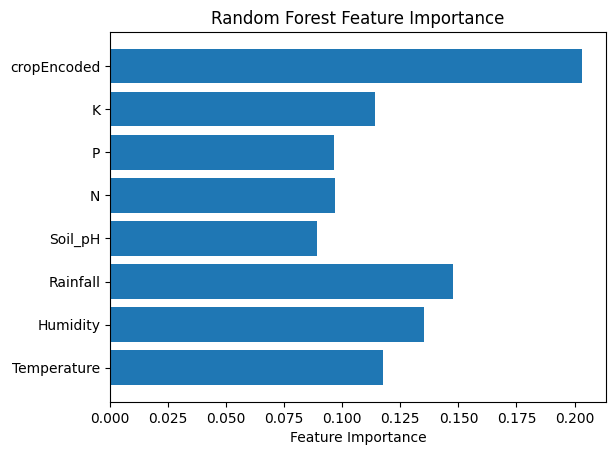

In [16]:
plt.barh(features, featImportances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

Trying to improve from 90.3

Hyperparameter tuning - keys are the hyperparamets that are defined for different algorithms

In [17]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

randomized search

In [18]:
search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [19]:
search.fit(xTrain, yTrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


D:\Codes\Optimus\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=2)

In [20]:
bestModel = search.best_estimator_

In [21]:
search.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [22]:
accuracy_score(yTest, bestModel.predict(xTest))

0.9166666666666666

In [23]:
sampleWeights = compute_sample_weight(class_weight='balanced', y=yTrain)

In [24]:
model = XGBClassifier(use_label_encoder=False, eval_metrics='mlogloss', random_state=42)
model.fit(xTrain, yTrain, sample_weight=sampleWeights)

D:\Codes\Optimus\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='mlogloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [25]:
yPred = model.predict(xTest)

In [26]:
accuracy_score(yTest, yPred)

0.9153005464480874

In [27]:
classification_report(yTest, yPred, target_names=la_disease.classes_)

D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                       precision    recall  f1-score   support\n\n          Anthracnose       0.83      0.93      0.88        27\n           Apple Scab       0.87      1.00      0.93        26\n     Bacterial Blight       1.00      0.91      0.95        32\nBacterial Leaf Blight       0.94      0.91      0.92        32\n       Bacterial Spot       0.85      0.93      0.89        30\n          Black Scurf       0.00      0.00      0.00         3\n           Brown Spot       0.96      1.00      0.98        26\n     Cedar Apple Rust       1.00      0.87      0.93        31\n          Common Rust       0.92      0.92      0.92        24\n          Common Scab       0.96      1.00      0.98        25\n         Downy Mildew       0.00      0.00      0.00         2\n         Early Blight       0.90      0.92      0.91        72\n          Fire Blight       1.00      1.00      1.00        28\n       Gray Leaf Spot       0.95      0.95      0.95        20\n          Karnal Bunt       0.17     

improving from 91.5

In [28]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(xTrain, yTrain)

D:\Codes\Optimus\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
yPred = model.predict(xTest)

In [30]:
accuracy_score(yTest, yPred)

0.9166666666666666

In [31]:
classification_report(yTest, yPred, target_names=la_disease.classes_)

D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                       precision    recall  f1-score   support\n\n          Anthracnose       0.89      0.93      0.91        27\n           Apple Scab       0.90      1.00      0.95        26\n     Bacterial Blight       0.97      0.94      0.95        32\nBacterial Leaf Blight       0.93      0.88      0.90        32\n       Bacterial Spot       0.91      0.97      0.94        30\n          Black Scurf       0.00      0.00      0.00         3\n           Brown Spot       0.93      1.00      0.96        26\n     Cedar Apple Rust       1.00      0.90      0.95        31\n          Common Rust       0.96      0.92      0.94        24\n          Common Scab       0.96      1.00      0.98        25\n         Downy Mildew       0.00      0.00      0.00         2\n         Early Blight       0.92      0.92      0.92        72\n          Fire Blight       1.00      1.00      1.00        28\n       Gray Leaf Spot       0.95      1.00      0.98        20\n          Karnal Bunt       0.20     

In [32]:
joblib.dump(model, "disease_predictor.pkl")
joblib.dump(la_crop, "crop_encoder.pkl")
joblib.dump(la_disease, "disease_encoder.pkl")

['disease_encoder.pkl']

In [33]:
featImportances = model.feature_importances_
features = x.columns

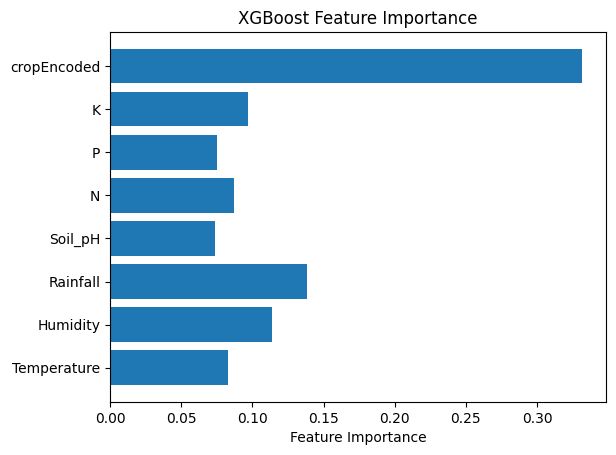

In [34]:
plt.barh(features, featImportances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [35]:
accuracy = accuracy_score(yTest, yPred)

In [36]:
accuracy

0.9166666666666666

In [37]:
precision = precision_score(yTest, yPred, average='weighted')

D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
precision

0.9085612834476847

In [39]:
recall = recall_score(yTest, yPred, average='weighted')

In [40]:
recall

0.9166666666666666

In [41]:
f1 = f1_score(yTest, yPred, average='weighted')

In [42]:
f1

0.9115040663666168

In [43]:
cm = confusion_matrix(yTest, yPred)

In [44]:
cm

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 28,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],


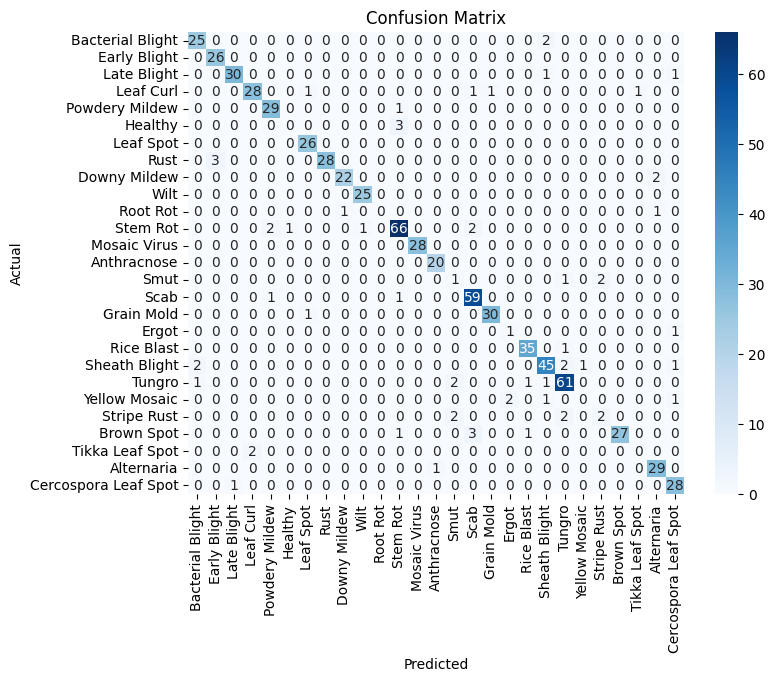

In [45]:
your_label_names = ['Bacterial Blight', 'Early Blight', 'Late Blight', 'Leaf Curl', 
    'Powdery Mildew', 'Healthy', 'Leaf Spot', 'Rust',
    'Downy Mildew', 'Wilt', 'Root Rot', 'Stem Rot',
    'Mosaic Virus', 'Anthracnose', 'Smut', 'Scab',
    'Grain Mold', 'Ergot', 'Rice Blast', 'Sheath Blight',
    'Tungro', 'Yellow Mosaic', 'Stripe Rust', 'Brown Spot',
    'Tikka Leaf Spot', 'Alternaria', 'Cercospora Leaf Spot']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=your_label_names, yticklabels=your_label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
classification_report(yTest, yPred, target_names=la_disease.classes_)

D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                       precision    recall  f1-score   support\n\n          Anthracnose       0.89      0.93      0.91        27\n           Apple Scab       0.90      1.00      0.95        26\n     Bacterial Blight       0.97      0.94      0.95        32\nBacterial Leaf Blight       0.93      0.88      0.90        32\n       Bacterial Spot       0.91      0.97      0.94        30\n          Black Scurf       0.00      0.00      0.00         3\n           Brown Spot       0.93      1.00      0.96        26\n     Cedar Apple Rust       1.00      0.90      0.95        31\n          Common Rust       0.96      0.92      0.94        24\n          Common Scab       0.96      1.00      0.98        25\n         Downy Mildew       0.00      0.00      0.00         2\n         Early Blight       0.92      0.92      0.92        72\n          Fire Blight       1.00      1.00      1.00        28\n       Gray Leaf Spot       0.95      1.00      0.98        20\n          Karnal Bunt       0.20     

In [47]:
report = classification_report(yTest, yPred, target_names=la_disease.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.round(2)

D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Anthracnose,0.89,0.93,0.91,27.00
Apple Scab,0.90,1.00,0.95,26.00
Bacterial Blight,0.97,0.94,0.95,32.00
Bacterial Leaf Blight,0.93,0.88,0.90,32.00
Bacterial Spot,0.91,0.97,0.94,30.00
Black Scurf,0.00,0.00,0.00,3.00
Brown Spot,0.93,1.00,0.96,26.00
Cedar Apple Rust,1.00,0.90,0.95,31.00
Common Rust,0.96,0.92,0.94,24.00
Common Scab,0.96,1.00,0.98,25.00


In [48]:
df_report.to_csv('classification_report.csv')

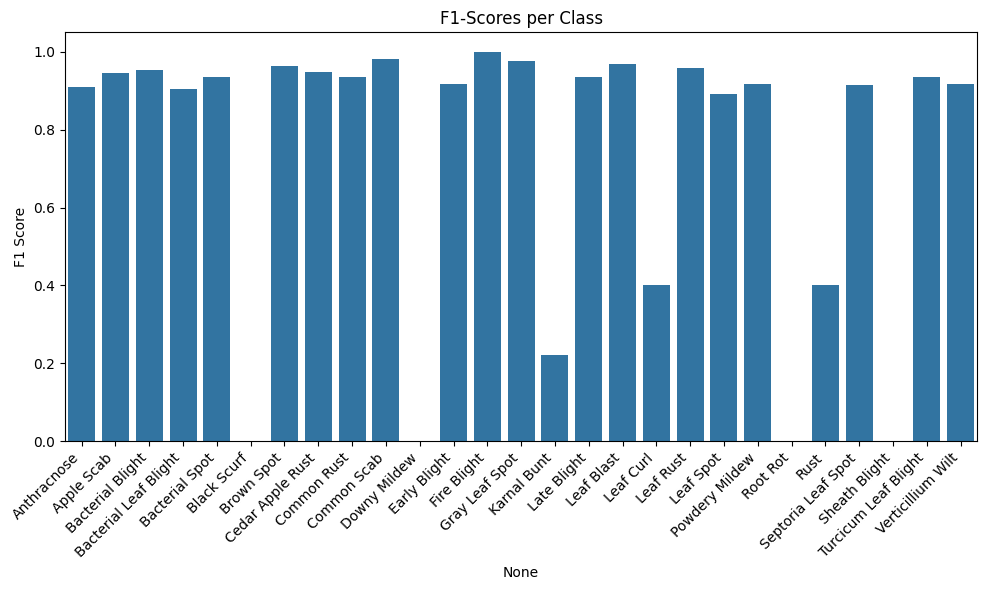

In [49]:
f1_scores = df_report.loc[la_disease.classes_, 'f1-score']

plt.figure(figsize=(10,6))
sns.barplot(x=f1_scores.index, y=f1_scores.values)
plt.xticks(rotation=45, ha='right')
plt.title("F1-Scores per Class")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

The model accuracy_score is 0.9167
The model precision is 0.9086
The model recall value is 0.9167
The model f1_score is 0.9115
The f1 score per class is: 


D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


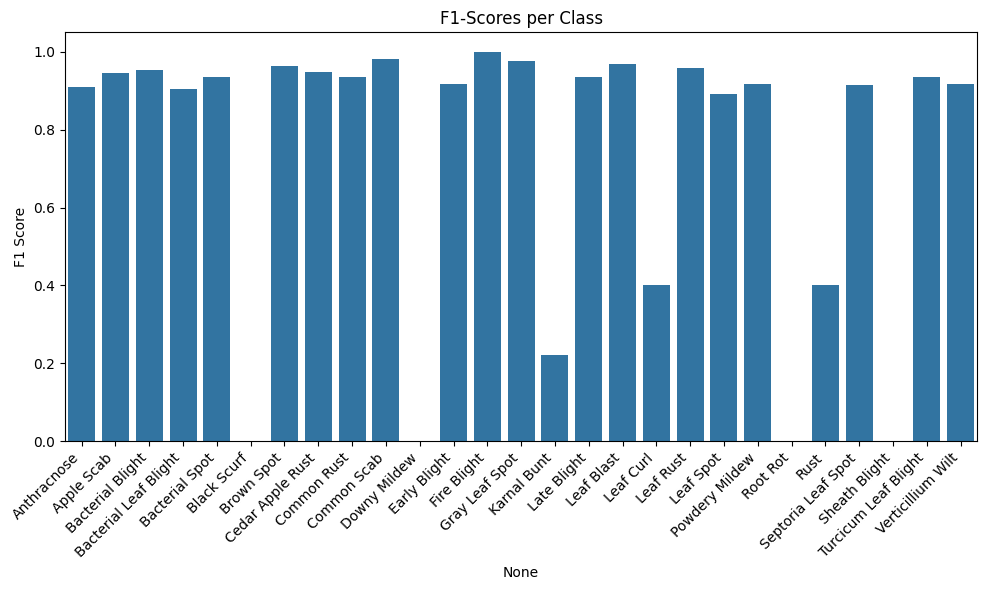

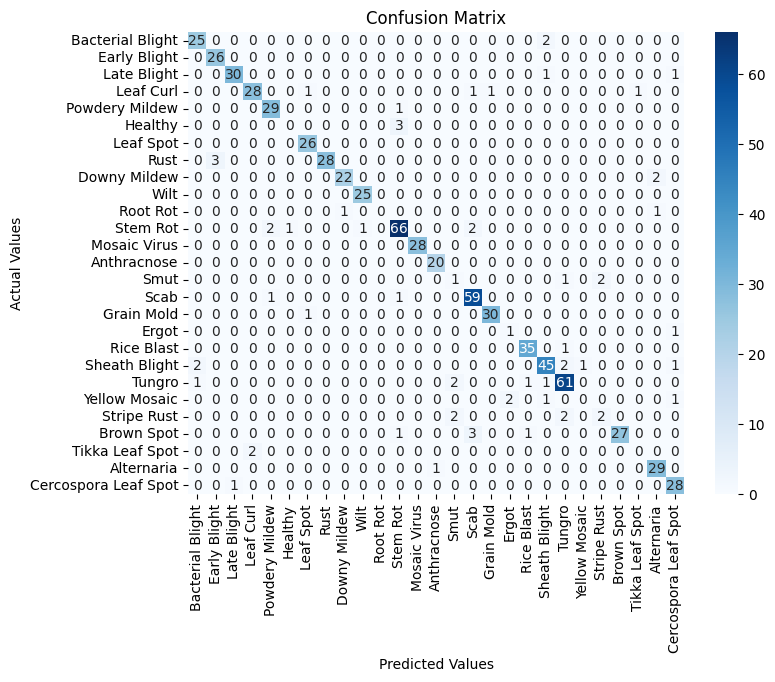


The classification report for the model is: 


D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Codes\Optimus\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Anthracnose,0.89,0.93,0.91,27.00
Apple Scab,0.90,1.00,0.95,26.00
Bacterial Blight,0.97,0.94,0.95,32.00
Bacterial Leaf Blight,0.93,0.88,0.90,32.00
Bacterial Spot,0.91,0.97,0.94,30.00
Black Scurf,0.00,0.00,0.00,3.00
Brown Spot,0.93,1.00,0.96,26.00
Cedar Apple Rust,1.00,0.90,0.95,31.00
Common Rust,0.96,0.92,0.94,24.00
Common Scab,0.96,1.00,0.98,25.00


In [50]:
accuracy = accuracy_score(yTest, yPred)
val = round(accuracy, 4)
print(f"The model accuracy_score is {val}")
precision = precision_score(yTest, yPred, average='weighted')
val = round(precision, 4)
print(f"The model precision is {val}")
recall = recall_score(yTest, yPred, average='weighted')
val = round(recall, 4)
print(f"The model recall value is {val}")
f1 = f1_score(yTest, yPred, average='weighted')
val = round(f1, 4)
print(f"The model f1_score is {val}")
print("The f1 score per class is: ")
f1_scores = df_report.loc[la_disease.classes_, 'f1-score']
plt.figure(figsize=(10,6))
sns.barplot(x=f1_scores.index, y=f1_scores.values)
plt.xticks(rotation=45, ha='right')
plt.title("F1-Scores per Class")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()
print()
targetLables = ['Bacterial Blight', 'Early Blight', 'Late Blight', 'Leaf Curl', 
    'Powdery Mildew', 'Healthy', 'Leaf Spot', 'Rust',
    'Downy Mildew', 'Wilt', 'Root Rot', 'Stem Rot',
    'Mosaic Virus', 'Anthracnose', 'Smut', 'Scab',
    'Grain Mold', 'Ergot', 'Rice Blast', 'Sheath Blight',
    'Tungro', 'Yellow Mosaic', 'Stripe Rust', 'Brown Spot',
    'Tikka Leaf Spot', 'Alternaria', 'Cercospora Leaf Spot']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=targetLables, yticklabels=targetLables)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()
print()
print("The classification report for the model is: ")
report = classification_report(yTest, yPred, target_names=la_disease.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.round(2)

In [51]:
df.shape

(3660, 11)

In [52]:
df.iloc[0,:]

Temperature               21.3
Humidity                  61.5
Rainfall                 134.1
Soil_pH                   5.89
N                           64
P                           59
K                           27
Crop                    Potato
Disease           Early Blight
cropEncoded                  4
diseaseEncoded              11
Name: 0, dtype: object